In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from msresist.RNAseq import preprocess_AXL_RNAseq_data

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1.2, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
rna = preprocess_AXL_RNAseq_data()
apoptosis_markers = pd.read_csv("/home/marcc/AXLomics/HALLMARK_APOPTOSIS.v2022.1.Hs.tsv", header=None).iloc[0, 0].split(",")
drop = ['AIFM3', 'AVPR1A', 'BCL2L10', 'BGN', 'BMP2', 'BTG2', 'CASP1', 'CASP9', 'CCNA1', 'CCND2', 'CD14', 'CD2', 'CD38', 'CD69', 'CTH', 'DCN', 'EGR3', 'EREG', 'F2', 'F2R', 'FAS', 'FASLG', 'FDXR', 'FEZ1', 'GCH1', 'GSTM1', 'GUCY2D', 'HGF', 'IER3', 'IFNB1', 'IL1A', 'IL1B', 'ISG20', 'LEF1', 'LPPR4', 'LUM', 'MMP2', 'PDGFRB', 'PLCB2', 'PRF1', 'PSEN2', 'RARA', 'RNASEL', 'SC5DL', 'TAP1', 'TGFBR3', 'TNF']
apoptosis_markers = [m for m in apoptosis_markers if m not in drop]
apoptosis_rna = rna.set_index(["Cell Lines", "Treatment"]).loc[:, apoptosis_markers].reset_index()
ap_rna_wtko = apoptosis_rna[
        (apoptosis_rna["Cell Lines"] == "WT") & 
        (apoptosis_rna["Treatment"] == "EA") | 
        (apoptosis_rna["Cell Lines"] == "KO") &
        (apoptosis_rna["Treatment"] == "E")
        ].set_index(["Cell Lines", "Treatment"]
        )

FileNotFoundError: [Errno 2] No such file or directory: '/home/marcc/AXLomics/msresist/data/RNAseq/AXLrna/AXLmutants_RNAseq_merged.feather'

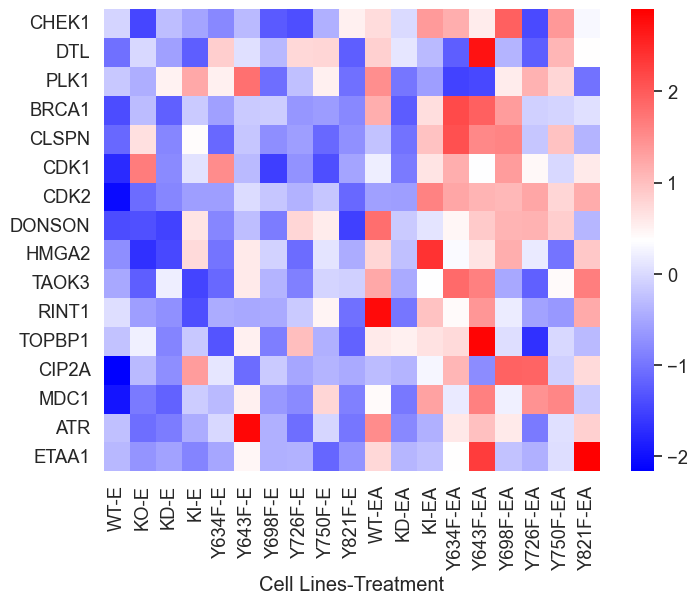

In [31]:
from scipy.stats import zscore
ddr = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/DDR/121222-DDR_heatmap.csv").set_index(["Cell Lines", "Treatment"])

_, ax = plt.subplots(1, 1, figsize=(8, 6))
g = sns.heatmap(zscore(ddr.T, axis=1), cmap="bwr", robust=False, ax=ax)
plt.savefig("DDR.svg")

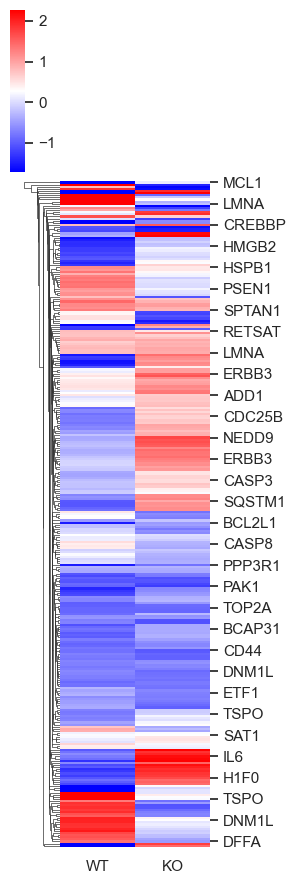

In [13]:
wt_ko_hm = ap_rna_wtko.T
wt_ko_hm.columns = ["KO", "WT"]
wt_ko_hm = wt_ko_hm[["WT", "KO"]]
g = sns.clustermap(wt_ko_hm, cmap="bwr", method="single", robust=True, figsize=(3, 9), col_cluster=False)

In [18]:
fc_wt_ko = pd.DataFrame()
fc_wt_ko["Gene"] = list(wt_ko_hm.index)
fc_wt_ko["logFC"] = wt_ko_hm["WT"].values - wt_ko_hm["KO"].values

Genes enriched in KO cells:

In [57]:
fc_wt_ko.sort_values(by="logFC").iloc[:10, :]

,Gene,logFC
197,IL18,-4.653109
39,BIK,-4.429506
237,PMAIP1,-3.718375
310,WEE1,-3.612153
179,GSR,-3.589008
226,PAK1,-3.421110
59,CASP8,-3.279078
64,CAV1,-3.260672
245,PPT1,-3.232189
228,PAK1,-3.067271


Genes enriched in apoptosis-on cells:

In [58]:
fc_wt_ko.sort_values(by="logFC", ascending=False).iloc[:10, :]

,Gene,logFC
143,EBP,4.097837
167,GPX3,4.028514
187,HSPB1,3.704964
180,GSR,3.536095
5,ANXA1,3.371886
206,LMNA,3.096112
295,TNFRSF12A,2.984855
106,CLU,2.964441
38,BID,2.901006
233,PEA15,2.667430


In [65]:
ap_rna_OnOff = apoptosis_rna[
        (apoptosis_rna["Cell Lines"] == "WT") & 
        (apoptosis_rna["Treatment"] == "EA") | 
        (apoptosis_rna["Cell Lines"] == "KO") &
        (apoptosis_rna["Treatment"] == "E") |
        (apoptosis_rna["Cell Lines"] == "Y634F") & 
        (apoptosis_rna["Treatment"] == "EA") |
        (apoptosis_rna["Cell Lines"] == "Y821F") & 
        (apoptosis_rna["Treatment"] == "EA") |
        (apoptosis_rna["Cell Lines"] == "KD") & 
        (apoptosis_rna["Treatment"] == "EA") |
        (apoptosis_rna["Cell Lines"] == "Y750F") & 
        (apoptosis_rna["Treatment"] == "EA")
        ].set_index(["Cell Lines", "Treatment"]
        )

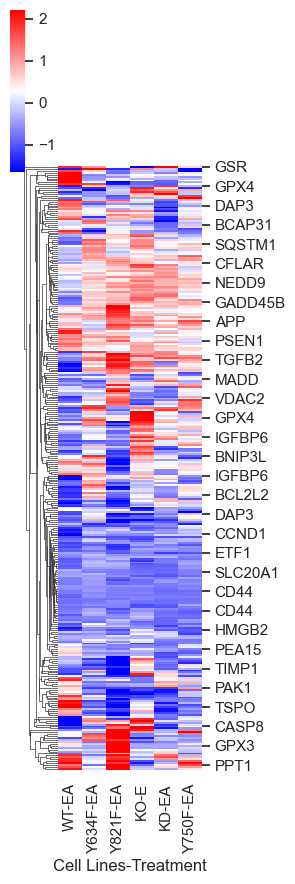

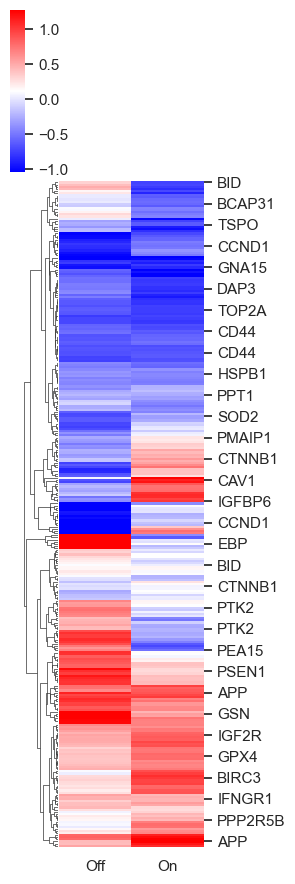

In [68]:
df = ap_rna_OnOff.T[["WT", "Y634F", "Y821F", "KO", "KD", "Y750F"]]
sns.clustermap(df[["WT", "Y634F", "Y821F", "KO", "KD", "Y750F"]], cmap="bwr", method="centroid", robust=True, figsize=(3, 9), col_cluster=False)
df_avgs = pd.concat([df[["WT", "Y634F", "Y821F"]].mean(axis=1), df[["KO", "KD", "Y750F"]].mean(axis=1)], axis=1)
df_avgs.columns = ["Off", "On"]
sns.clustermap(df_avgs, cmap="bwr", method="centroid", robust=True, figsize=(3, 9), col_cluster=False)

In [69]:
fc_off_on = pd.DataFrame()
fc_off_on["Gene"] = list(df.index)
fc_off_on["logFC"] = df_avgs.iloc[:, 0].values - df_avgs.iloc[:, 1].values

Genes enriched in apoptosis-off cells:

In [70]:
fc_off_on.sort_values(by="logFC", ascending=False).iloc[:30, :]

,Gene,logFC
211,LMNA,2.435930
116,CTNNB1,2.047591
65,CAV1,1.865317
50,CASP2,1.641367
106,CLU,1.604259
28,BCL10,1.561663
271,SOD2,1.481703
196,IGFBP6,1.439224
168,GPX3,1.422603
308,VDAC2,1.420498


Genes enriched in apoptosis-on cells:

In [71]:
fc_off_on.sort_values(by="logFC").iloc[:30, :]

,Gene,logFC
151,ERBB2,-1.942314
253,RELA,-1.901114
245,PPT1,-1.892735
169,GPX4,-1.794808
64,CAV1,-1.784772
193,IGFBP6,-1.615149
66,CAV1,-1.600012
284,SQSTM1,-1.472977
194,IGFBP6,-1.420965
113,CTNNB1,-1.346570


In [ ]:
d = rnaHL
samples = [c.split("_")[0] for c in list(d.columns)]

In [73]:
ap_rna_OnOff.T

Cell Lines,KD,KO,Y750F,Y821F,Y634F,WT
Treatment,EA,E,EA,EA,EA,EA
ADD1,0.697627,0.043416,0.514005,1.273918,1.099485,1.133077
ADD1,0.484455,0.672972,1.761109,-1.011759,-0.550552,0.463662
ANKH,-0.793296,-1.230752,-0.965569,-0.855179,-0.266157,1.213124
ANKH,-1.549039,0.171395,-0.468408,-1.051532,-0.163831,1.264571
ANKH,-0.627636,-0.470304,-1.433324,-0.874896,-1.334055,-0.214018
...,...,...,...,...,...,...
VDAC2,-0.392318,-0.406841,0.436925,3.619714,-0.144275,0.423821
VDAC2,-0.353954,-0.390207,0.536597,1.453594,0.573744,-1.081997
WEE1,-0.590201,1.437617,0.343501,1.997226,0.797597,-2.174536


In [75]:
import gseapy as gp

In [100]:
d = rna[
    (rna["Cell Lines"] == "WT") &
    (rna["Treatment"] == "EA") |
    (rna["Cell Lines"] == "Y634F") &
    (rna["Treatment"] == "EA") |
    (rna["Cell Lines"] == "Y698F") &
    (rna["Treatment"] == "EA") |
    (rna["Cell Lines"] == "Y726F") &
    (rna["Treatment"] == "EA") |
    (rna["Cell Lines"] == "Y821F") &
    (rna["Treatment"] == "EA") |
    (rna["Cell Lines"] == "KO") &
    (rna["Treatment"] == "E") |
    (rna["Cell Lines"] == "KD") &
    (rna["Treatment"] == "E") |
    (rna["Cell Lines"] == "Y643F") &
    (rna["Treatment"] == "E") |
    (rna["Cell Lines"] == "Y750F") &
    (rna["Treatment"] == "E")
].set_index("Cell Lines").drop("Treatment", axis=1).T

In [101]:
d = d[["WT", "Y634F", "Y698F", "Y726F", "Y821F", "KO", "KD", "Y643F", "Y750F"]]
samples = ["Apoptosis-Off", "Apoptosis-Off", "Apoptosis-Off", "Apoptosis-Off", "Apoptosis-Off", "Apoptosis-On", "Apoptosis-On", "Apoptosis-On", "Apoptosis-On"]

In [85]:
# names = pd.DataFrame(gp.get_library_name())
# names[names[0].str.contains("GO")]

In [102]:
gs_res = gp.gsea(
                data=d.reset_index(), 
                gene_sets=['MSigDB_Oncogenic_Signatures', "WikiPathway_2021_Human", "GO_Biological_Process_2021"],
                cls=samples, 
                permutation_num=100, 
                outdir='/home/marcc/AXLomics/msresist/data/RNAseq/GSEA/AXL_RNAseq_gsea/Apoptosis_OffVsOn',
                method='signal_to_noise',
                processes=4, seed= 7,
                format='png'
                )

/tmp/ipykernel_1206067/4232762302.py:1: DeprecationWarning: processes is deprecated; use threads
  gs_res = gp.gsea(
2022-12-06 18:45:22,234 Warning: dropping duplicated gene names, only keep the first values
/home/marcc/.local/lib/python3.10/site-packages/gseapy/gsea.py:110: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_std = df.groupby(by=cls_dict, axis=1).std()
/home/marcc/.local/lib/python3.10/site-packages/gseapy/gsea.py:168: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_std = df.groupby(by=classes, axis=1).std()
